In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
from warnings import filterwarnings
from scipy import stats
from scipy.stats import   ttest_1samp,ttest_ind
filterwarnings("ignore")

## Problem 1

In [2]:
df = pd.read_csv('Wholesale+Customers+Data.csv')

In [3]:
df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [4]:
df.shape

(440, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [6]:
df.describe().round(decimals=2)

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.00,440.00,440.00,440.00,440.00,440.00,440.00
mean,220.50,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87
std,127.16,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11
min,1.00,3.00,55.00,3.00,25.00,3.00,3.00
25%,110.75,3127.75,1533.00,2153.00,742.25,256.75,408.25
50%,220.50,8504.00,3627.00,4755.50,1526.00,816.50,965.50
75%,330.25,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25
max,440.00,112151.00,73498.00,92780.00,60869.00,40827.00,47943.00


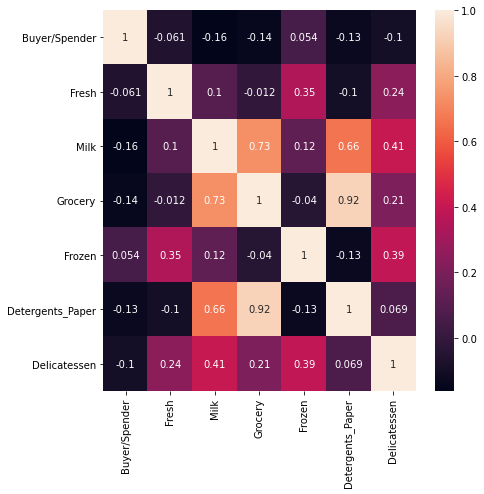

In [7]:
cor = df.corr()
plt.figure(figsize=(7, 7))
sns.heatmap(cor,annot = True);

<Figure size 504x504 with 0 Axes>

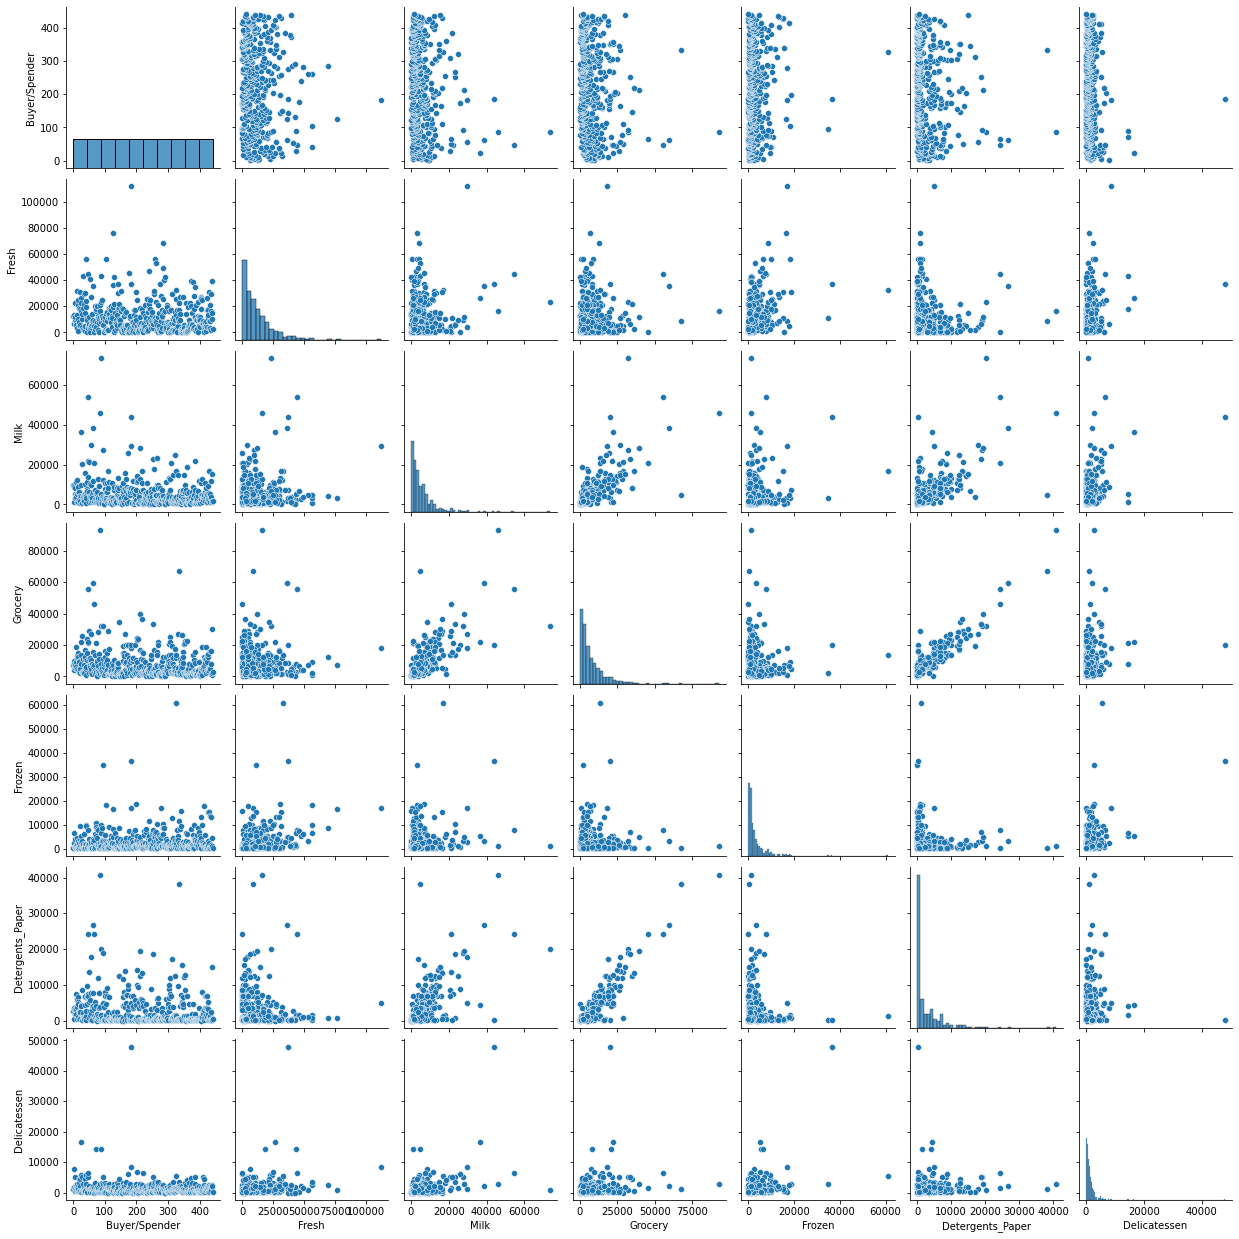

In [8]:
plt.figure(figsize=(7, 7))
sns.pairplot(data=df)

In [9]:
df_1 = df.copy()
df_1['Total_Spends'] = df_1.Fresh + df_1.Milk + df_1.Grocery + df_1.Frozen + df_1.Detergents_Paper + df_1.Delicatessen 
df_1

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,Total_Spends
0,1,Retail,Other,12669,9656,7561,214,2674,1338,34112
1,2,Retail,Other,7057,9810,9568,1762,3293,1776,33266
2,3,Retail,Other,6353,8808,7684,2405,3516,7844,36610
3,4,Hotel,Other,13265,1196,4221,6404,507,1788,27381
4,5,Retail,Other,22615,5410,7198,3915,1777,5185,46100
...,...,...,...,...,...,...,...,...,...,...
435,436,Hotel,Other,29703,12051,16027,13135,182,2204,73302
436,437,Hotel,Other,39228,1431,764,4510,93,2346,48372
437,438,Retail,Other,14531,15488,30243,437,14841,1867,77407
438,439,Hotel,Other,10290,1981,2232,1038,168,2125,17834


Q1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

In [10]:
d1_1 = df_1.groupby('Region')['Total_Spends'].sum().to_frame().reset_index()
d1_1.columns = ['Regions', 'Total_Spends']
d1_1

,Regions,Total_Spends
0,Lisbon,2386813
1,Oporto,1555088
2,Other,10677599


In [11]:
d1_2 = df_1.groupby('Channel')['Total_Spends'].sum().to_frame().reset_index()
d1_2.columns = ['Channel', 'Total_Spends']
d1_2

,Channel,Total_Spends
0,Hotel,7999569
1,Retail,6619931


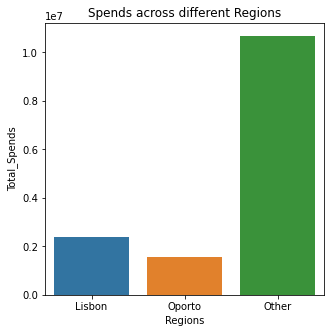

In [12]:
plt.figure(figsize=(5, 5))
plt.title('Spends across different Regions')
sns.barplot( x='Regions', y='Total_Spends', data=d1_1);

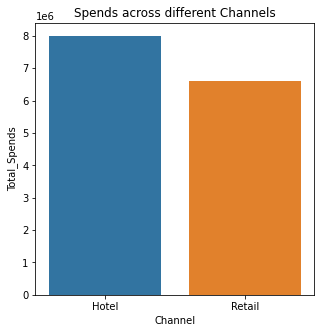

In [13]:
plt.figure(figsize=(5, 5))
plt.title('Spends across different Channels')
sns.barplot( x = 'Channel', y = 'Total_Spends', data=d1_2);

Q1.2. There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

In [14]:
d1_3 = df.groupby('Region')['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'].apply(lambda x : x.astype(int).sum()).reset_index()
d1_3

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Lisbon,854833,422454,570037,231026,204136,104327
1,Oporto,464721,239144,433274,190132,173311,54506
2,Other,3960577,1888759,2495251,930492,890410,512110


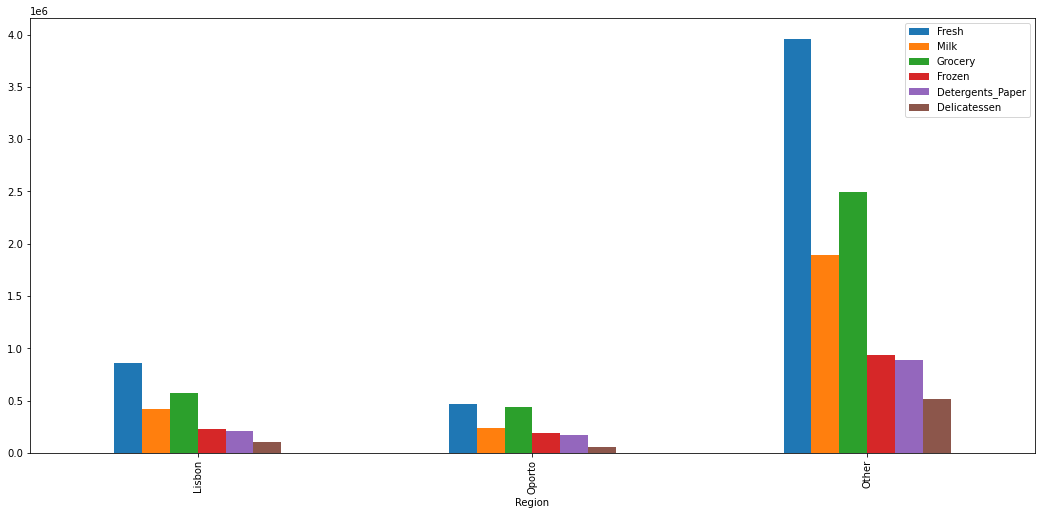

In [15]:
d1_3.plot(x="Region", y=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'], kind = 'bar', figsize=(18,8));

In [16]:
d1_4 = df.groupby('Channel')['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'].apply(lambda x : x.astype(int).sum()).reset_index()
d1_4

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Hotel,4015717,1028614,1180717,1116979,235587,421955
1,Retail,1264414,1521743,2317845,234671,1032270,248988


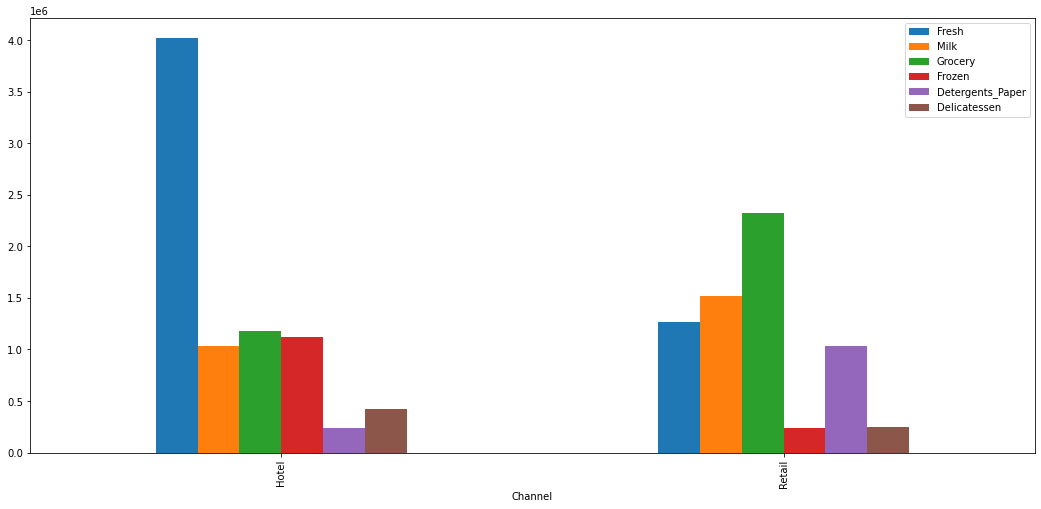

In [17]:
d1_4.plot(x="Channel", y=['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'], kind = 'bar', figsize=(18,8));

Q1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [18]:
cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']
d1_5 = df[cols].std().to_frame().reset_index()
d1_5.columns = ['Item', 'Standard Deviation']
d1_5.round(decimals=2)

,Item,Standard Deviation
0,Fresh,12647.33
1,Milk,7380.38
2,Grocery,9503.16
3,Frozen,4854.67
4,Detergents_Paper,4767.85
5,Delicatessen,2820.11


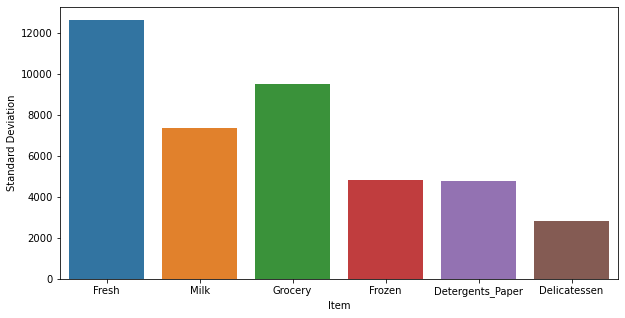

In [19]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Item', y = 'Standard Deviation', data=d1_5);

Q 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

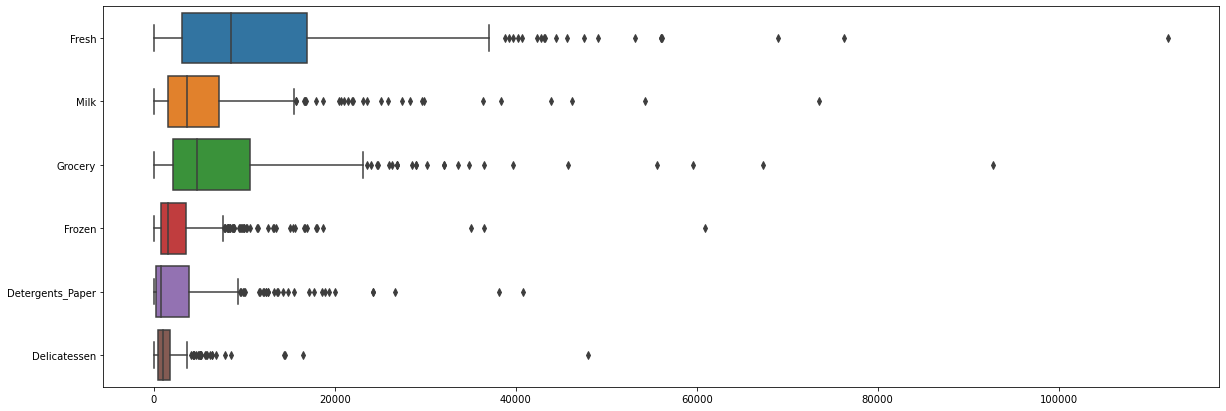

In [20]:
plt.figure(figsize=(20, 7))
sns.boxplot(data=df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']], orient='h');

# Problem 2

In [21]:
df_cm = pd.read_csv('Survey-1.csv')

In [22]:
df_cm.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [23]:
df_cm.shape

(62, 14)

In [24]:
df_cm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


In [25]:
df_cm.dtypes

ID                     int64
Gender                object
Age                    int64
Class                 object
Major                 object
Grad Intention        object
GPA                  float64
Employment            object
Salary               float64
Social Networking      int64
Satisfaction           int64
Spending               int64
Computer              object
Text Messages          int64
dtype: object

In [26]:
df_cm.describe().round(decimals=2)

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.00,62.00,62.00,62.00,62.00,62.00,62.00,62.00
mean,31.50,21.13,3.13,48.55,1.52,3.74,482.02,246.21
std,18.04,1.43,0.38,12.08,0.84,1.21,221.95,214.47
min,1.00,18.00,2.30,25.00,0.00,1.00,100.00,0.00
25%,16.25,20.00,2.90,40.00,1.00,3.00,312.50,100.00
50%,31.50,21.00,3.15,50.00,1.00,4.00,500.00,200.00
75%,46.75,22.00,3.40,55.00,2.00,4.00,600.00,300.00
max,62.00,26.00,3.90,80.00,4.00,6.00,1400.00,900.00


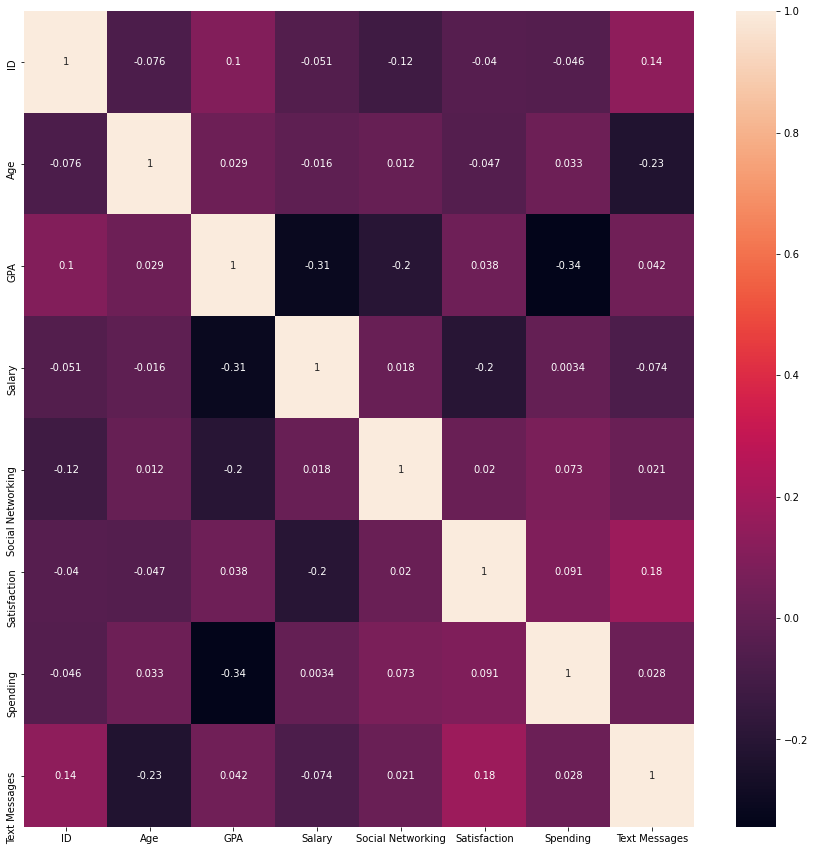

In [27]:
cor = df_cm.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(cor,annot = True);

<Figure size 1080x1080 with 0 Axes>

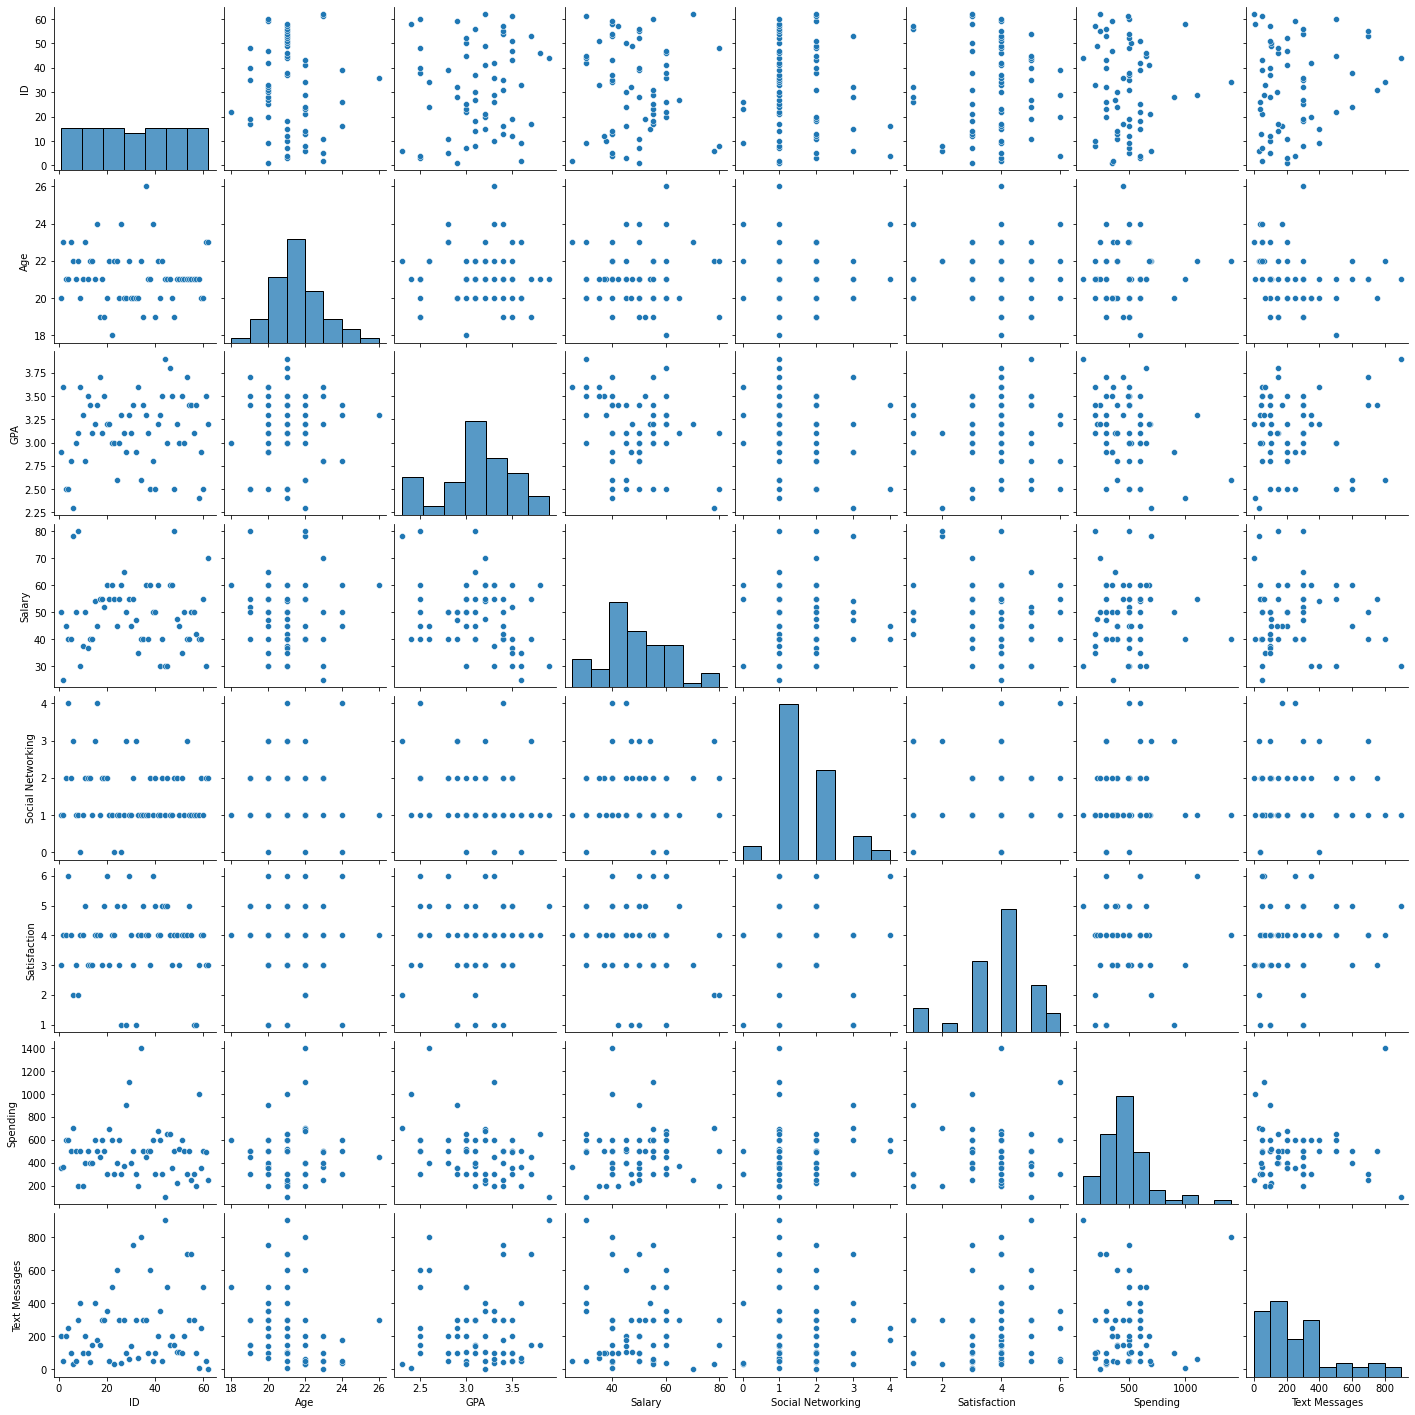

In [28]:
plt.figure(figsize=(15, 15))
sns.pairplot(data=df_cm);

Q 2.1 For this data, construct the following contingency tables (Keep Gender as row variable)

Q 2.1.1 Gender and Major

In [29]:
data_g_m = pd.crosstab(df_cm['Gender'], df_cm['Major'])
data_g_m

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


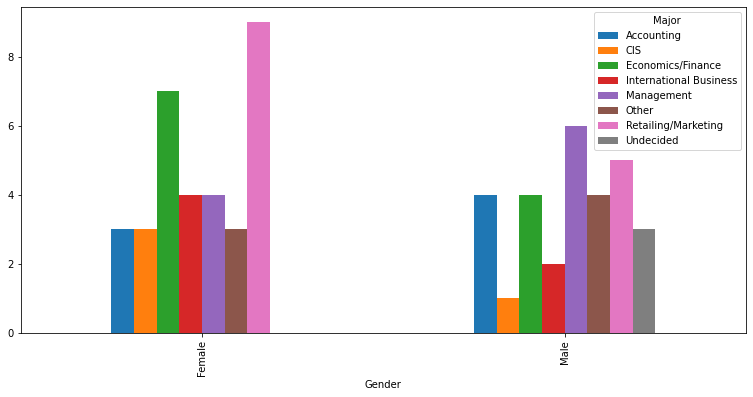

In [30]:
data_g_m.plot.bar(figsize = (13,6));

Q 2.1.2 Gender and Grad Intention

In [31]:
data_g_gr = pd.crosstab(df_cm['Gender'], df_cm['Grad Intention'])
data_g_gr

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


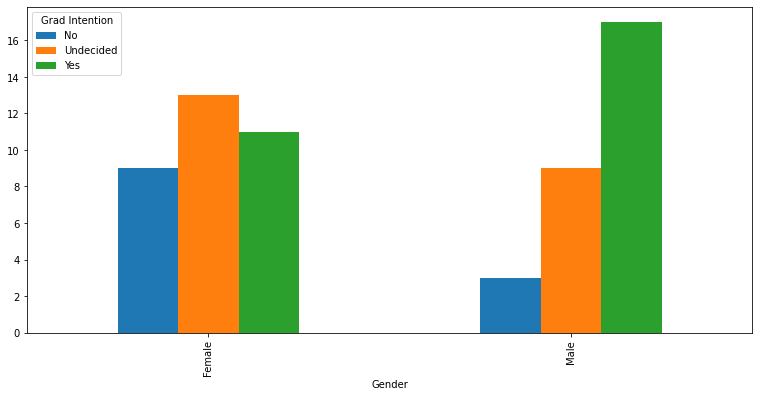

In [32]:
data_g_gr.plot.bar(figsize = (13,6));

Q 2.1.3. Gender and Employment

In [33]:
data_g_e = pd.crosstab(df_cm['Gender'], df_cm['Employment'])
data_g_e

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


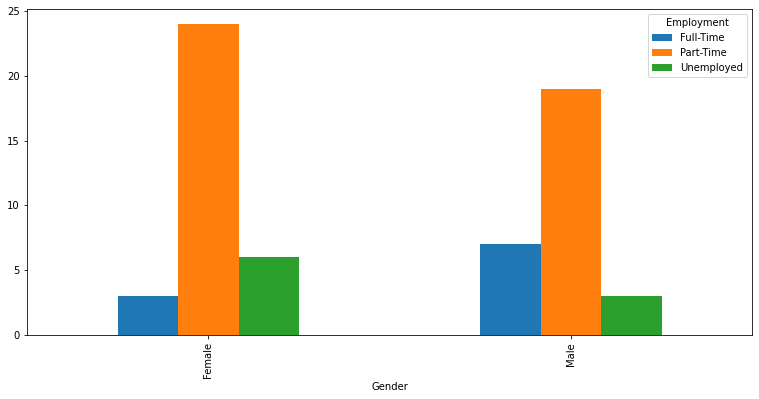

In [34]:
data_g_e.plot.bar(figsize = (13,6));

Q 2.1.4 Gender and Computer

In [35]:
data_g_c = pd.crosstab(df_cm['Gender'], df_cm['Computer'])
data_g_c

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


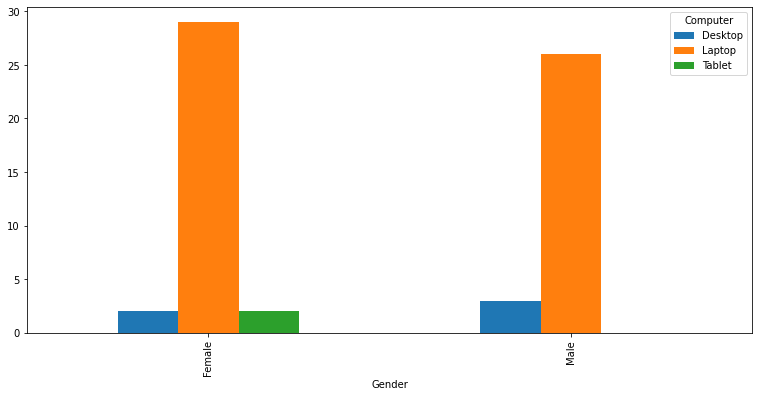

In [36]:
data_g_c.plot.bar(figsize = (13,6));

Q 2.2. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

In [37]:
df_cm.Gender.value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

Q 2.2.1 What is the probability that a randomly selected CMSU student will be male?

In [38]:
num_of_males = 29
total = 62
prob = round((num_of_males/total),2)
print("Probability that a randomly selected CMSU student will be male is : ", prob)

Probability that a randomly selected CMSU student will be male is :  0.47


Q 2.2.2 What is the probability that a randomly selected CMSU student will be female?

In [39]:
num_of_females = 33
total = 62
prob1 = round((num_of_females/total),2)
print("Probability that a randomly selected CMSU student will be female is : ", prob1)

Probability that a randomly selected CMSU student will be female is :  0.53


Q 2.3. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

In [40]:
df_cm.Major.unique()

array(['Other', 'Management', 'CIS', 'Economics/Finance', 'Undecided',
       'International Business', 'Retailing/Marketing', 'Accounting'],
      dtype=object)

Q 2.3.1 Find the conditional probability of different majors among the male students in CMSU.

In [41]:
rm_males = len(df_cm[(df_cm.Major == 'Retailing/Marketing') & (df_cm.Gender == 'Male')].index)
p_rm = round(rm_males/num_of_males,2)
print('Conditional Probability that a randomly selected student belonging to Retailing/Marketing will be a male is: ',p_rm)

Conditional Probability that a randomly selected student belonging to Retailing/Marketing will be a male is:  0.17


In [42]:
ef_males = len(df_cm[(df_cm.Major == 'Economics/Finance') & (df_cm.Gender == 'Male')].index)
p_ef = round(ef_males/num_of_males,2)
print('Conditional Probability that a randomly selected student belonging to Economics/Finance will be a male is: ',p_ef)

Conditional Probability that a randomly selected student belonging to Economics/Finance will be a male is:  0.14


In [43]:
m_males = len(df_cm[(df_cm.Major == 'Management') & (df_cm.Gender == 'Male')].index)
p_m =  round(m_males/num_of_males,2)
print('Conditional Probability that a randomly selected student belonging to Management will be a male is: ',p_m)

Conditional Probability that a randomly selected student belonging to Management will be a male is:  0.21


In [44]:
a_males = len(df_cm[(df_cm.Major == 'Accounting') & (df_cm.Gender == 'Male')].index)
p_a =  round(a_males/num_of_males,2)
print('Conditional Probability that a randomly selected student belonging to Accounting will be a male is: ',p_a)

Conditional Probability that a randomly selected student belonging to Accounting will be a male is:  0.14


In [45]:
o_males = len(df_cm[(df_cm.Major == 'Other') & (df_cm.Gender == 'Male')].index)
p_o =  round(o_males/num_of_males,2)
print('Conditional Probability that a randomly selected student belonging to Other will be a male is: ',p_o)

Conditional Probability that a randomly selected student belonging to Other will be a male is:  0.14


In [46]:
ib_males = len(df_cm[(df_cm.Major == 'International Business') & (df_cm.Gender == 'Male')].index)
p_ib =  round(ib_males/num_of_males,2)
print('Conditional Probability that a randomly selected student belonging to International Business will be a male is: ',p_ib)

Conditional Probability that a randomly selected student belonging to International Business will be a male is:  0.07


In [47]:
ci_males = len(df_cm[(df_cm.Major == 'CIS') & (df_cm.Gender == 'Male')].index)
p_ci =  round(ci_males/num_of_males,2)
print('Conditional Probability that a randomly selected student belonging to CIS will be a male is: ',p_ci)

Conditional Probability that a randomly selected student belonging to CIS will be a male is:  0.03


In [48]:
u_males = len(df_cm[(df_cm.Major == 'Undecided') & (df_cm.Gender == 'Male')].index)
p_u =  round(u_males/num_of_males,2)
print('Conditional Probability that a randomly selected student belonging to Undecided will be a male is: ',p_u)

Conditional Probability that a randomly selected student belonging to Undecided will be a male is:  0.1


Q 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [49]:
rm_females = len(df_cm[(df_cm.Major == 'Retailing/Marketing') & (df_cm.Gender == 'Female')].index)
rm_p = round(rm_females/num_of_females,2)
print("Conditional Probability that a randomly selected student belonging to Retailing/Marketing will be a female is :",rm_p)

Conditional Probability that a randomly selected student belonging to Retailing/Marketing will be a female is : 0.27


In [50]:
ef_females = len(df_cm[(df_cm.Major == 'Economics/Finance') & (df_cm.Gender == 'Female')].index)
ef_p = round(ef_females/num_of_females,2)
print("Conditional Probability that a randomly selected student belonging to Economics/Finance will be a female is :",ef_p)

Conditional Probability that a randomly selected student belonging to Economics/Finance will be a female is : 0.21


In [51]:
m_females = len(df_cm[(df_cm.Major == 'Management') & (df_cm.Gender == 'Female')].index)
m_p=round(m_females/num_of_females,2)
print("Conditional Probability that a randomly selected student belonging to Management will be a female is: ",m_p)

Conditional Probability that a randomly selected student belonging to Management will be a female is:  0.12


In [52]:
a_females = len(df_cm[(df_cm.Major == 'Accounting') & (df_cm.Gender == 'Female')].index)
a_p=round(a_females/num_of_females,2)
print("Conditional Probability that a randomly selected student belonging to Accounting will be a female is :",a_p)

Conditional Probability that a randomly selected student belonging to Accounting will be a female is : 0.09


In [53]:
o_females = len(df_cm[(df_cm.Major == 'Other') & (df_cm.Gender == 'Female')].index)
o_p=round(o_females/num_of_females,2)
print("Conditional Probability that a randomly selected student belonging to Other will be a female is :",o_p)

Conditional Probability that a randomly selected student belonging to Other will be a female is : 0.09


In [54]:
ib_females = len(df_cm[(df_cm.Major == 'International Business') & (df_cm.Gender == 'Female')].index)
ib_p=round(ib_females/num_of_females,2)
print("Conditional Probability that a randomly selected student belonging to International Business will be a female is:",ib_p)

Conditional Probability that a randomly selected student belonging to International Business will be a female is: 0.12


In [55]:
cis_females = len(df_cm[(df_cm.Major == 'CIS') & (df_cm.Gender == 'Female')].index)
cis_p=round(cis_females/num_of_females,2)
print("Conditional Probability that a randomly selected student belonging to CIS will be a female is: ",cis_p)

Conditional Probability that a randomly selected student belonging to CIS will be a female is:  0.09


In [56]:
u_females = len(df_cm[(df_cm.Major == 'Undecided') & (df_cm.Gender == 'Female')].index)
u_p=round(u_females/num_of_females,2)
print("Conditional Probability that a randomly selected student belonging to Undecided will be a female is :",u_p)

Conditional Probability that a randomly selected student belonging to Undecided will be a female is : 0.0


Q 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

Q 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

In [57]:
grad_intended_males = len(df_cm[(df_cm['Grad Intention'] == 'Yes') & (df_cm.Gender == 'Male')].index)
total = 62
probab = round(grad_intended_males/total,2)
print("Probability that a randomly chosen student is a male and intends to graduate: ",probab)

Probability that a randomly chosen student is a male and intends to graduate:  0.27


Q 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

In [58]:
females_no_lapi = len(df_cm[(df_cm.Gender == 'Female') & (df_cm.Computer != 'Laptop')].index)
total = 62
probab1 = round(females_no_lapi/total,2)
print("Probability that a randomly selected student is a female and does NOT have a laptop is:",probab1)

Probability that a randomly selected student is a female and does NOT have a laptop is: 0.06


Q 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

Q 2.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

In [59]:
prob_male = round(num_of_males / total,2)
prob_full_time = round(len(df_cm[df_cm.Employment == 'Full-Time'].index)/total,2)
prob_male_and_full_time = round(len(df_cm[(df_cm.Employment == 'Full-Time') & (df_cm.Gender == 'Male')].index)/total,2)
res = prob_male + prob_full_time - prob_male_and_full_time
print("Probability that a randomly chosen student is a male or has full-time employment :",res)

Probability that a randomly chosen student is a male or has full-time employment : 0.52


Q 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [60]:
fem_int_busi_or_manage = len(df_cm[(df_cm.Gender == 'Female') & (df_cm.Major.isin(['International Business','Management']))].index)
p1 = round(fem_int_busi_or_manage/num_of_females,2)
print("Conditional probability that given a female student is randomly chosen, she is majoring in international business or management is :",p1)

Conditional probability that given a female student is randomly chosen, she is majoring in international business or management is : 0.24


Q 2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [61]:
df_cm_dup = df_cm[df_cm['Grad Intention'] != 'Undecided']
d1 = pd.crosstab(df_cm_dup['Gender'], df_cm_dup['Grad Intention'])
d1

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


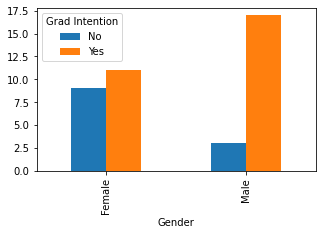

In [62]:
d1.plot.bar(figsize = (5,3));

In [63]:
num_of_female_grad_yes = len(df_cm[(df_cm['Grad Intention'] == 'Yes') & (df_cm.Gender == 'Female')])
prob_grad_yes_given_female = round(num_of_female_grad_yes/num_of_females,2)
prob_grad_yes_given_female

0.33

In [64]:
prob_grad_yes = round(len(df_cm[df_cm['Grad Intention'] == 'Yes'].index)/total,2)
prob_grad_yes

0.45

Q 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

Q 2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [65]:
num_of_stud_less_than_3_gpa = len(df_cm[df_cm.GPA < 3.0].index)
p2 = round(num_of_stud_less_than_3_gpa/total,2)
print("Probability of randomly selected student is having GPA < 3: ",p2)

Probability of randomly selected student is having GPA < 3:  0.27


Q 2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [66]:
male_earn_50_or_more = len(df_cm[(df_cm.Gender == 'Male') & (df_cm.Salary >= 50)].index)
cp1 = round(male_earn_50_or_more/num_of_males,2)
print("Conditional probability that a randomly selected male earns 50 or more is: ",cp1)

Conditional probability that a randomly selected male earns 50 or more is:  0.48


In [67]:
female_earn_50_or_more = len(df_cm[(df_cm.Gender == 'Female') & (df_cm.Salary >= 50)].index)
cp2 = round(female_earn_50_or_more/num_of_females,2)
print("Conditional probability that a randomly selected female earns 50 or more is: ",cp2)

Conditional probability that a randomly selected female earns 50 or more is:  0.55


Q 2.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

In [68]:
def get_mean_median_mode_and_plot(inp):
    mean_val = np.mean(df_cm[inp])
    median_val = np.median(df_cm[inp])
    mode_val = stats.mode(df_cm[inp])

    print("{}, {}, {}".format(mean_val, median_val, mode_val))
    
    plt.figure(figsize=(5, 5))
    sns.displot(df_cm, x=inp, kind='kde');

3.129032258064516, 3.1500000000000004, ModeResult(mode=array([3.]), count=array([7]))


<Figure size 360x360 with 0 Axes>

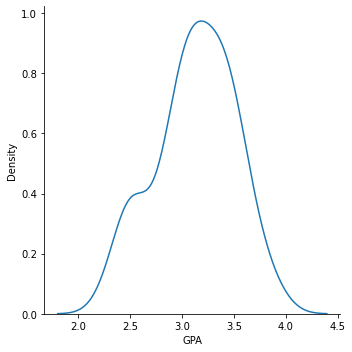

In [69]:
get_mean_median_mode_and_plot('GPA')

48.54838709677419, 50.0, ModeResult(mode=array([40.]), count=array([12]))


<Figure size 360x360 with 0 Axes>

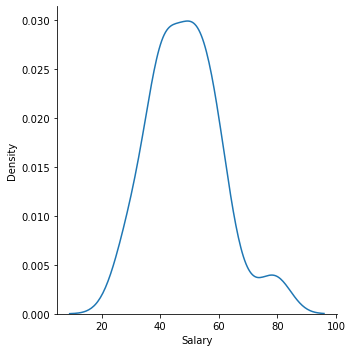

In [70]:
get_mean_median_mode_and_plot('Salary')

482.01612903225805, 500.0, ModeResult(mode=array([500], dtype=int64), count=array([14]))


<Figure size 360x360 with 0 Axes>

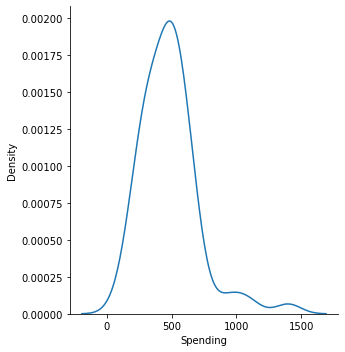

In [71]:
get_mean_median_mode_and_plot('Spending')

246.20967741935485, 200.0, ModeResult(mode=array([300], dtype=int64), count=array([10]))


<Figure size 360x360 with 0 Axes>

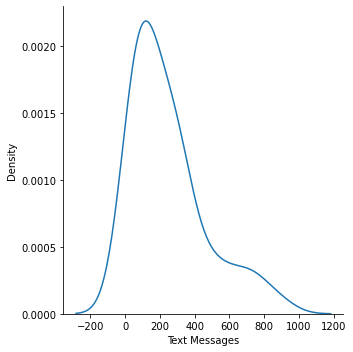

In [72]:
get_mean_median_mode_and_plot('Text Messages')

# Problem 3

An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.

In [73]:
df_s = pd.read_csv('A+&+B+shingles.csv')

In [74]:
df_s

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37
5,0.24,0.18
6,0.16,0.42
7,0.20,0.58
8,0.20,0.25
9,0.20,0.41


Q 3.1 Do you think there is evidence that mean moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

In [75]:
# Hypothesized mean = 0.35
t_statistic, p_value = ttest_1samp(df_s['A'], 0.35)
print(round(t_statistic,3), round(p_value,3)) #Python gives us a two tailed test. The pvalue here is for two-tailed test.

-1.474 0.15


In [76]:
#The following is the pvalue for a one-tailed test.
round((p_value/2),3)

0.075

In [77]:
# Hypothesized mean = 0.35
t_statistic1, p_value1 = ttest_1samp(df_s['B'].dropna(), 0.35)
print(round(t_statistic1,3), round(p_value1,3)) #Python gives us a two tailed test. The pvalue here is for two-tailed test.

-3.1 0.004


In [78]:
#The following is the pvalue for a one-tailed test.
round((p_value1/2),3)

0.002

3.2 Do you think that the population means for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

In [79]:
t_stat, p_val = ttest_ind(df_s['A'],df_s['B'].dropna())
print(round(t_stat,3), round(p_val,3)) # here it is a two-tailed test

1.29 0.202


# The End!!!